<div dir="rtl" width="100%">

# למידת מכונה/אינטיליגנציה מלאכותית  - המדריך הפרקטי
--------------------------------------
# 1. מבוא

## לפני שמתחילים
##### לפני שנתחיל, כמה כלים שיעזרו לנו: מחברת פייטון הידועה גם בשם מחברת jupyter (זו אינה שגיאת כתיב), סביבת עבודה בענן בה נוכל לפתח בלי להתקין כלום, וכמובן שפת פייטון השפה דה פקטו לכתוב קוד למידת מכונה 

### א. קיצורים
##### בהרבה מקומות נשתמש בקיצורים הבאים: ML - Machine Learninf (למידת מכונה) ו AI - Artificial Inteligence (אינטיליגציה מלאכותית)

### ב. IPython ( jupyter) notebook
##### אם תגללו למטה תראו שדף זה בנוי משני סוגי תאים - תאים של טקסט (נקרא markdown) ותאים של קוד פייטון. מחברת פיטון כזאת מקובלת בהרבה אתרים העוסקים בלמידת מכונה
### ג. סביבת פיתוח בענן
##### בכדי לפתח נצטרך סביבת עבודה, לשימחתנו [גוגל מספקים אחת כזאת ](https://colab.research.google.com/ "goole colab") בענן ו[דוגמאות](https://github.com/tensorflow/workshops)  עם שמירה ב google-docs ואפילו מאפשרים האצה בGPU.

### ד. TensorFlow ( או TF)
##### זוהי ספריית פייטון מבית גוגל (קוד פתוח), המיועדת ללמידת מכונה ובעיקר רשתות ניורונים. היא מתחילה מבסיס שהוא ה"אסמבלי" של ML ומכילה רמות גבוהות יותר כמו Keras המקבילה לשפה עילית. נפגוש אותה בהמשך

### ה. שפת Python
##### אני לא אכנס פה ללימוד שפת פייטון, אני מניח שאדם שתכנת בשפה זו או אחרת יוכל להבין וללמוד תוך כדי. בנוסף ישנם באינטרנט אין ספור מדריכים לפייטון
##### למי שמגיע משפת תכנות אחרת, אציין שהדבר ה"מוזר" בפייטון הינו שאם בשפות אחרות אינדנטציה היא בשביל קריאות הקוד ואינה משפיעה על פעולתו, בפיטון אינדנטציה היא חובה.
##### שימו לב להבדל בין:

</div >

In [1]:
for i in range(5):
    print(i)
    print("good night")

0
good night
1
good night
2
good night
3
good night
4
good night


<div dir="rtl">

##### לבין:

</div >

In [2]:
for i in range(5):
    print(i)
print("good night")

0
1
2
3
4
good night


<div dir="rtl">

##### טוב, אנחנו מוכנים, אז נתחיל

# רגרסיה ליניארית
##### נייצר לנו נתונים (ונלמד קצת פייטון בדרך):
##### נתחיל בייבוא הספריות אותם אנו צריכים:
</div >

In [3]:
import matplotlib.pyplot as plt # for graphs
import numpy as np # for calculations

<div dir="rtl">

##### נגדיר פונקציה בשם gen_data שתייצר לנו את הנתונים. שימו לב שאנחנו מייצרים קו ישר שמוגדר ע"י השיפוע M ונקודת החיתוך עם ציר ה Y - שהיא N:
</div >

In [4]:
def gen_data():
    x=np.arange(10.0) # x=[0.0, 1.0, ... , 9.0] - 10 numbers
    print("x=",x)

    M=-0.7 # slope
    N=1.1 # y-axis intersect
    print("M=",M)
    print("N=",N)

    y=x*M+N
    print("y=",y)
    return x,y



<div dir="rtl">

##### נריץ את gen_data ונשמור את הערכים שמחזירה לתוך a  ו b:

</div >

In [5]:
print("printed output of gen_data:")
a,b=gen_data()

print("")
print("after gen_data")
print("a is:")
a # this will be shown as Out[]: array ...

printed output of gen_data:
x= [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
M= -0.7
N= 1.1
y= [ 1.1  0.4 -0.3 -1.  -1.7 -2.4 -3.1 -3.8 -4.5 -5.2]

after gen_data
a is:


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

<div dir="rtl">

##### שימו לב שהמשתנים בתוך הפונקציה x,y,m,n אינם נגישים בחוץ, ואילו בחוץ ישנם המשתנים a ו b (נתתי שמות שונים בכוונה להמחיש את ההבדל)
##### עכשיו נציג את a ו b בגרף בעזרת הפונקציה שיצרנו קודם - plot_data

</div >

<div dir="rtl">


##### נגדיר פונקציה בשם plot_data שתצייר לנו את הנתונים:

</div >

In [6]:
def plot_data(x,y,flags='o',title='A Graph',y2=[],flags2="ro"):
    if (len(y2)):
        plt.plot(x, y,flags,x,y2,flags2) # 2 graphs
    else:
        plt.plot(x, y,flags) # 1 graph
    plt.xlabel('X - axis')
    plt.ylabel('Y - axis')
    plt.title(title)
    plt.grid(True)
    #plt.savefig("test.png")
    plt.show()
    


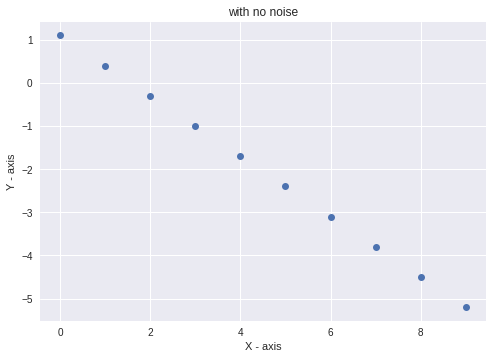

In [7]:
plot_data(a,b,title='with no noise')

<div dir="rtl">



##### נוסיף קצת רעש ונצייר שוב:

</div >

b= [ 1.1  0.4 -0.3 -1.  -1.7 -2.4 -3.1 -3.8 -4.5 -5.2]
noise= [-0.1205105   0.54007053  0.72530666 -0.48564284 -0.9668749   0.60150688
 -0.79655314 -0.89032093 -0.82910117  0.03532141]
b+noise= [ 0.9794895   0.94007053  0.42530666 -1.48564284 -2.6668749  -1.79849312
 -3.89655314 -4.69032093 -5.32910117 -5.16467859]


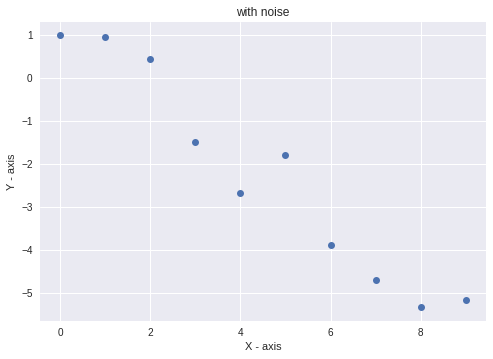

In [8]:
noise=np.random.random(len(b)) # retruns array of values between 0.0 and 1.0
noise=(noise-0.5) # now is array in range -0.5 to 0.5
noise=noise*2 # now is array in range -1 to 1

print("b=",b)
print("noise=",noise)
b_with_noise=b+noise
print("b+noise=",b_with_noise)

plot_data(a,b_with_noise,title='with noise')


<div dir="rtl">



##### , נלמד קצת על TensorFlow לפני שנשתמש ברגרסיה ליניארית לנסות לשחזר לנו את הקו המקורי:

</div >

<div dir="rtl">

# TensorFlow

##### בסיס: ב TensorFlow אנחנו מגדירים קודם את הבעיה בלי לפתור אותה ורק אח"כ מחשבים. לדוגמא:
</div >

In [9]:
import tensorflow as tf

#define problem 2.0*3.0

#c1=2.0
c1 = tf.constant(2.0)

#c2=3.0
c2 = tf.constant(3.0)


#mul1=c1*c2
mul1 = c1 * c2

# Start tf session
sess = tf.Session()


print("c1 is ",c1,"with value ",sess.run(c1))
print("c2 is ",c2,"with value ",sess.run(c2))
print("mul1 is ",mul1)
  

    
# solve to problem
res=sess.run(mul1)
print("res:",res)

#close the session
sess.close();


c1 is  Tensor("Const:0", shape=(), dtype=float32) with value  2.0
c2 is  Tensor("Const_1:0", shape=(), dtype=float32) with value  3.0
mul1 is  Tensor("mul:0", shape=(), dtype=float32)
res: 6.0


<div dir="rtl">


##### להרחבה ניתן לצפות [בסרטון הבא](https://www.youtube.com/watch?v=yX8KuPZCAMo) (באנגלית)

#### בחזרה לרגרסיה הליניארית:
##### אנחנו רוצים למצוא את M ו N. קודם נגדיר אותם כ Variables ונאתחל אותם לערך כלשהו לדוגמא 0.5, יותר מאוחר נמצא את הערכים שלהם

</div >

In [10]:
M=tf.Variable([0.5],tf.float32)
N=tf.Variable([0.5],tf.float32)

<div dir="rtl">

##### נגדיר מקום להכניס את הנתונים שיצרנו קודם ונקרא להם X ו Y (רק נגדיר מקום. את הנתונים נכניס אח"כ)
</div >

In [11]:
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

<div dir="rtl">

##### נחשב את הקו הישר Calculated_Y ואת LOSS - הטעות בין Calculated_Y  שחישבנו מהנתונים לנתונים עצמם:
</div >

In [12]:
Calculated_Y=X*M+N

loss_vector=Y-Calculated_Y
loss=tf.reduce_sum(tf.square(loss_vector)) # sum of square of delta Y.

<div dir="rtl">

##### נאתחל את המשתנים הגלובליים:
</div >

In [13]:
init=tf.global_variables_initializer()

<div dir="rtl">

##### נבחר באופטימייזר מסוג gardient descent (לא נרחיב עליו עכשיו) עם מקדם קפיצה של 0.002 ונבקש ממנו לנסות להקטין את LOSS למינימום:
</div >

In [14]:
optimizer = tf.train.GradientDescentOptimizer(0.001)
train = optimizer.minimize(loss)

<div dir="rtl">

##### נריץ 10 איטרציות בהם האופטימיזר ינסה לתקן את M ו N בכדי להקטין את ריבועי מרחקי הנקודות מהקו
</div >

In [15]:
with tf.Session() as sess: # auto close the session 
    sess.run(init)
    iterations=5000
    for i in range(iterations): #run iterations
        print("running batch %d/%d:" % (i+1,iterations))
        sess.run(train,{ X:a,Y:b_with_noise}); #optimize with x taken from a, and y taken from b+noise
        #print("  Estimated M=",sess.run(M))
        #print("  Estimated N=",sess.run(N))
    m_res=sess.run(M)
    n_res=sess.run(N)
            

running batch 1/5000:
running batch 2/5000:
running batch 3/5000:
running batch 4/5000:
running batch 5/5000:
running batch 6/5000:
running batch 7/5000:
running batch 8/5000:
running batch 9/5000:
running batch 10/5000:
running batch 11/5000:
running batch 12/5000:
running batch 13/5000:
running batch 14/5000:
running batch 15/5000:
running batch 16/5000:
running batch 17/5000:
running batch 18/5000:
running batch 19/5000:
running batch 20/5000:
running batch 21/5000:
running batch 22/5000:
running batch 23/5000:
running batch 24/5000:
running batch 25/5000:
running batch 26/5000:
running batch 27/5000:
running batch 28/5000:
running batch 29/5000:
running batch 30/5000:
running batch 31/5000:
running batch 32/5000:
running batch 33/5000:
running batch 34/5000:
running batch 35/5000:
running batch 36/5000:
running batch 37/5000:
running batch 38/5000:
running batch 39/5000:
running batch 40/5000:
running batch 41/5000:
running batch 42/5000:
running batch 43/5000:
running batch 44/500


running batch 1339/5000:
running batch 1340/5000:
running batch 1341/5000:
running batch 1342/5000:
running batch 1343/5000:
running batch 1344/5000:
running batch 1345/5000:
running batch 1346/5000:
running batch 1347/5000:
running batch 1348/5000:
running batch 1349/5000:
running batch 1350/5000:
running batch 1351/5000:
running batch 1352/5000:
running batch 1353/5000:
running batch 1354/5000:
running batch 1355/5000:
running batch 1356/5000:
running batch 1357/5000:
running batch 1358/5000:
running batch 1359/5000:
running batch 1360/5000:
running batch 1361/5000:
running batch 1362/5000:
running batch 1363/5000:
running batch 1364/5000:
running batch 1365/5000:
running batch 1366/5000:
running batch 1367/5000:
running batch 1368/5000:
running batch 1369/5000:
running batch 1370/5000:
running batch 1371/5000:
running batch 1372/5000:
running batch 1373/5000:
running batch 1374/5000:
running batch 1375/5000:
running batch 1376/5000:
running batch 1377/5000:
running batch 1378/5000:

running batch 2449/5000:
running batch 2450/5000:
running batch 2451/5000:
running batch 2452/5000:
running batch 2453/5000:
running batch 2454/5000:
running batch 2455/5000:
running batch 2456/5000:
running batch 2457/5000:
running batch 2458/5000:
running batch 2459/5000:
running batch 2460/5000:
running batch 2461/5000:
running batch 2462/5000:
running batch 2463/5000:
running batch 2464/5000:
running batch 2465/5000:
running batch 2466/5000:
running batch 2467/5000:
running batch 2468/5000:
running batch 2469/5000:
running batch 2470/5000:
running batch 2471/5000:
running batch 2472/5000:
running batch 2473/5000:
running batch 2474/5000:
running batch 2475/5000:
running batch 2476/5000:
running batch 2477/5000:
running batch 2478/5000:
running batch 2479/5000:
running batch 2480/5000:
running batch 2481/5000:
running batch 2482/5000:
running batch 2483/5000:
running batch 2484/5000:
running batch 2485/5000:
running batch 2486/5000:
running batch 2487/5000:
running batch 2488/5000:


running batch 3759/5000:
running batch 3760/5000:
running batch 3761/5000:
running batch 3762/5000:
running batch 3763/5000:
running batch 3764/5000:
running batch 3765/5000:
running batch 3766/5000:
running batch 3767/5000:
running batch 3768/5000:
running batch 3769/5000:
running batch 3770/5000:
running batch 3771/5000:
running batch 3772/5000:
running batch 3773/5000:
running batch 3774/5000:
running batch 3775/5000:
running batch 3776/5000:
running batch 3777/5000:
running batch 3778/5000:
running batch 3779/5000:
running batch 3780/5000:
running batch 3781/5000:
running batch 3782/5000:
running batch 3783/5000:
running batch 3784/5000:
running batch 3785/5000:
running batch 3786/5000:
running batch 3787/5000:
running batch 3788/5000:
running batch 3789/5000:
running batch 3790/5000:
running batch 3791/5000:
running batch 3792/5000:
running batch 3793/5000:
running batch 3794/5000:
running batch 3795/5000:
running batch 3796/5000:
running batch 3797/5000:
running batch 3798/5000:


<div dir="rtl">

##### נצייר את הקו עבור ה M ו ה N שקיבלנו באדום ואת המקורי בכחול:
</div >

calculated M,N: [-0.79469043] [1.3074243]
new_y= [ 1.30742431  0.51273388 -0.28195655 -1.07664698 -1.87133741 -2.66602784
 -3.46071827 -4.2554087  -5.05009913 -5.84478956]


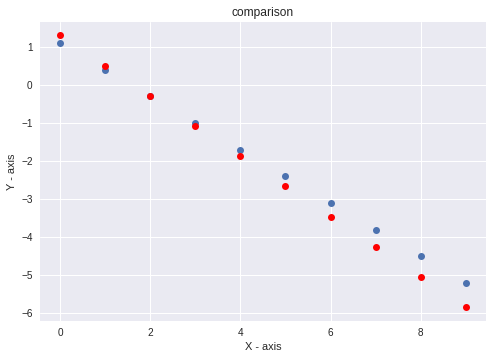

In [16]:
print("calculated M,N:",m_res,n_res)
new_y=m_res*a+n_res;
print("new_y=",new_y)
plot_data(a,b,y2=new_y,title='comparison')

<div dir="rtl">

##### ניתן לראות שלמרות הרעש שהכנסנו, הצלחנו לשערך לא רע את הקו המקורי:
</div >